In [369]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

pd.set_option('display.float_format', None) 

In [328]:
N = 100
WEIGHT = [50, 2, 3, -4]
NOISE = np.random.normal(0, 3, N)

In [370]:
df = pd.DataFrame(np.random.randint(0, 2, size=(N, 3)), columns=["item1", "item2", "item3"])
df = pd.concat([pd.DataFrame(np.ones(N, dtype=np.int8), columns=['base']), df], axis=1)

In [371]:
X = df.to_numpy()

y_ideal = np.matrix(X) * np.matrix(WEIGHT).T
y = y_ideal + np.matrix(NOISE).T

y_ideal = np.array(y_ideal).reshape(-1)
y = np.array(y).reshape(-1)

In [372]:
df = pd.concat([df, pd.DataFrame(y_ideal, columns=['yield_ideal'])], axis=1)
df = pd.concat([df, pd.DataFrame(y, columns=['yield'])], axis=1)
df

,base,item1,item2,item3,yield_ideal,yield
0,1,1,0,1,48,49.961300
1,1,0,0,1,46,46.427445
2,1,0,0,0,50,56.580779
3,1,1,1,1,51,50.996772
4,1,0,0,0,50,50.805330
...,...,...,...,...,...,...
95,1,1,1,1,51,54.766603
96,1,0,1,0,53,52.418767
97,1,1,1,0,55,51.959329
98,1,0,0,1,46,46.573825


<Axes: xlabel='yield_ideal', ylabel='yield'>

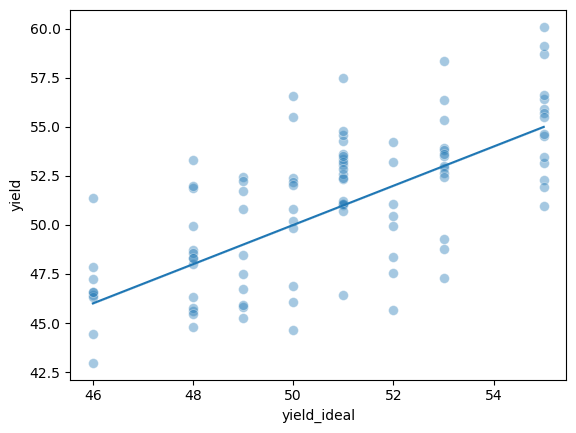

In [373]:
sns.scatterplot(data=df, x="yield_ideal", y="yield", alpha=0.4, s=50)
sns.lineplot(data=df, x='yield_ideal', y='yield_ideal')

In [374]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_

print(w)

[49.55961947  2.06089541  3.51101567 -3.14947035]


In [375]:
base = np.mean(df[(df['item1'] == 0) & (df['item2'] == 0) & (df['item3'] == 0)]['yield'])

print("base:", base)
df[(df['item1'] == 0) & (df['item2'] == 0) & (df['item3'] == 0)]

base: 50.64687851236395


,base,item1,item2,item3,yield_ideal,yield
2,1,0,0,0,50,56.580779
4,1,0,0,0,50,50.805330
31,1,0,0,0,50,55.487556
32,1,0,0,0,50,50.181381
38,1,0,0,0,50,52.413529
39,1,0,0,0,50,49.845040
47,1,0,0,0,50,52.163707
53,1,0,0,0,50,52.039673
54,1,0,0,0,50,44.651596
69,1,0,0,0,50,46.865966


In [376]:
w1 = np.mean(df[(df['item1'] == 1) & (df['item2'] == 0) & (df['item3'] == 0)]['yield']) - base

print("itam1:", w1)
df[(df['item1'] == 1) & (df['item2'] == 0) & (df['item3'] == 0)]

itam1: -0.5823578294079539


,base,item1,item2,item3,yield_ideal,yield
9,1,1,0,0,52,53.202758
15,1,1,0,0,52,50.436712
27,1,1,0,0,52,45.688233
36,1,1,0,0,52,47.571541
58,1,1,0,0,52,54.217000
74,1,1,0,0,52,51.075555
76,1,1,0,0,52,48.353053
77,1,1,0,0,52,49.971314


In [377]:
w2 = np.mean(df[(df['item1'] == 0) & (df['item2'] == 1) & (df['item3'] == 0)]['yield']) - base

print("itam2:", w2)
df[(df['item1'] == 0) & (df['item2'] == 1) & (df['item3'] == 0)]

itam2: 2.304745638834632


,base,item1,item2,item3,yield_ideal,yield
17,1,0,1,0,53,53.922486
20,1,0,1,0,53,52.905544
22,1,0,1,0,53,53.836345
23,1,0,1,0,53,56.363666
30,1,0,1,0,53,53.522354
49,1,0,1,0,53,55.326774
52,1,0,1,0,53,58.365862
60,1,0,1,0,53,47.320310
66,1,0,1,0,53,53.596073
70,1,0,1,0,53,52.994811


In [378]:
w3 = np.mean(df[(df['item1'] == 0) & (df['item2'] == 0) & (df['item3'] == 1)]['yield']) - base

print("itam3:", w3)
df[(df['item1'] == 0) & (df['item2'] == 0) & (df['item3'] == 1)]

itam3: -4.005277767245488


,base,item1,item2,item3,yield_ideal,yield
1,1,0,0,1,46,46.427445
10,1,0,0,1,46,46.582965
26,1,0,0,1,46,46.318281
42,1,0,0,1,46,47.864250
45,1,0,0,1,46,47.254788
50,1,0,0,1,46,42.972959
63,1,0,0,1,46,51.361974
80,1,0,0,1,46,44.417920
98,1,0,0,1,46,46.573825


In [379]:
y_multi = np.array(np.matrix(X) * np.matrix(w).T).reshape(-1)
y_single = base * df['base'].to_numpy() + w1 * df['item1'].to_numpy() + w2 * df['item2'].to_numpy() + w3 * df['item3'].to_numpy()

df = pd.concat([df, pd.DataFrame(y_single, columns=['yield_single'])], axis=1)
df = pd.concat([df, pd.DataFrame(y_multi, columns=['yield_multi'])], axis=1)
df

,base,item1,item2,item3,yield_ideal,yield,yield_single,yield_multi
0,1,1,0,1,48,49.961300,46.059243,48.471045
1,1,0,0,1,46,46.427445,46.641601,46.410149
2,1,0,0,0,50,56.580779,50.646879,49.559619
3,1,1,1,1,51,50.996772,48.363989,51.982060
4,1,0,0,0,50,50.805330,50.646879,49.559619
...,...,...,...,...,...,...,...,...
95,1,1,1,1,51,54.766603,48.363989,51.982060
96,1,0,1,0,53,52.418767,52.951624,53.070635
97,1,1,1,0,55,51.959329,52.369266,55.131531
98,1,0,0,1,46,46.573825,46.641601,46.410149


In [380]:
print("mean:", np.mean(df['yield']))
print("single:", np.mean(df['yield_single']))
print("multi:", np.mean(df['yield_multi']))

mean: 51.11238540584223
single: 49.574766159451926
multi: 51.11238540584224


In [381]:
print("MSE single:", np.sum(np.abs(y-y_single) ** 2) / N)
print("MSE single:", np.sum(np.abs(y-y_multi) ** 2) / N)

MSE single: 12.495404385145013
MSE single: 7.623799326133117


In [382]:
df['yield_multi'].to_numpy()
print("MSE:", )

MSE:


<Axes: xlabel='yield', ylabel='yield_single'>

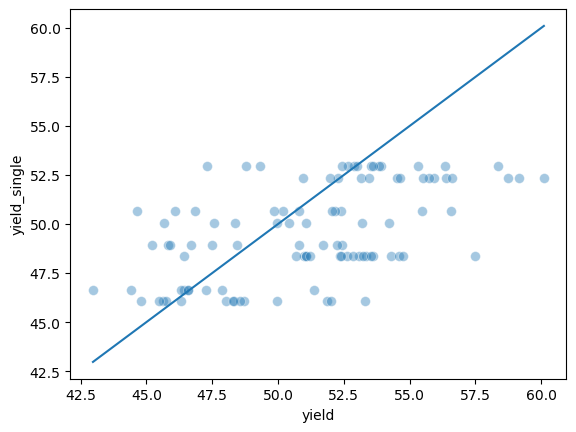

In [383]:
sns.scatterplot(data=df, x="yield", y="yield_single", alpha=0.4, s=50)
sns.lineplot(data=df, x='yield', y='yield')

<Axes: xlabel='yield', ylabel='yield_multi'>

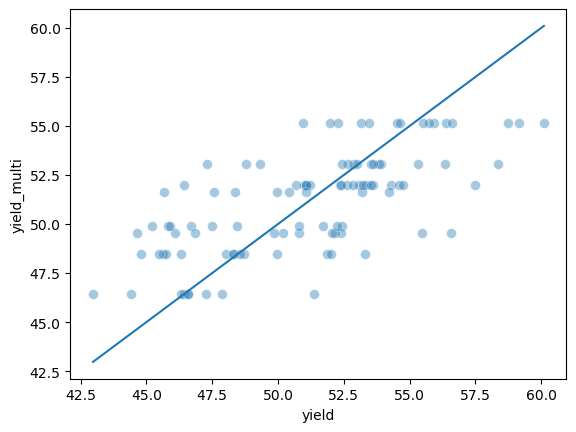

In [384]:
sns.scatterplot(data=df, x="yield", y="yield_multi", alpha=0.4, s=50)
sns.lineplot(data=df, x='yield', y='yield')